In [111]:
import pandas as pd
import csv
import numpy as np

In [112]:
import networkx as nx

In [113]:
import matplotlib.pyplot as plt

In [114]:
from IPython.display import HTML, display

In [115]:
from community import community_louvain

In [116]:
from scipy.stats import hypergeom

### task 1
Reading the intersection (df_i), and the union (df_u)

In [404]:
with open('part_1/seedgenesUniProt.csv') as f:
    seeds = [x.strip() for x in f.read().splitlines()]
#seeds = seeds[1:]

In [238]:
df_i = pd.read_csv('part_1/4.3_intersections.csv', usecols=['UniProt1_x', 'UniProt2_x'])

In [243]:
df_i.columns = ['UniProt_A','UniProt_B']
df_i.tail()

,UniProt_A,UniProt_B
475,Q13568,Q99836
476,Q13568,Q99836
477,Q13568,Q92793
478,Q13568,Q9Y4K3
479,Q13568,Q9Y4K3


In [244]:
len(df_i)

480

create a graph for the intersection

In [119]:
nodes_i = []
edges_i = [df_i.values]
for r in df_i.values:
    nodes_i.append(r[0])
    nodes_i.append(r[1])

In [120]:
G_i = nx.Graph()

In [121]:
G_i.add_nodes_from(nodes_i)
G_i.add_edges_from(*edges_i)

### nx.draw(G_i, node_size=30)

In [245]:
df_u = pd.read_csv('part_1/4.2_union_iid_interactom.csv', usecols=['UniProt1', 'UniProt2'])

In [246]:
df_u.columns = ['UniProt_A','UniProt_B']
len(df_u)

3668

Create a graph for the union

In [247]:
nodes_u = []
edges_u = [df_u.values]
for r in df_u.values:
    nodes_u.append(r[0])
    nodes_u.append(r[1])

In [248]:
G_u = nx.Graph()

In [249]:
G_u.add_nodes_from(nodes_u)
G_u.add_edges_from(*edges_u)

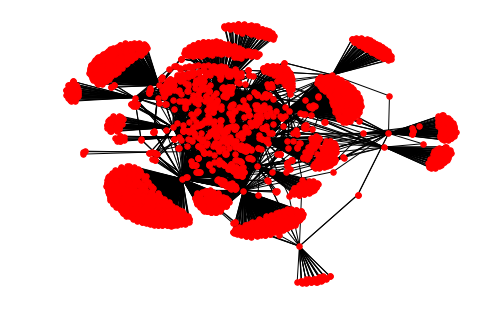

In [250]:
nx.draw(G_u, node_size=30)

### 1.1

networks global measures:

In [251]:
# number of nodes for the intersection
nx.number_of_nodes(G_i)

136

In [252]:
# number of nodes for the union
nx.number_of_nodes(G_u)

2243

In [253]:
# number of edges for the intersection
nx.number_of_edges(G_i)

149

In [254]:
# number of edges for the union

nx.number_of_edges(G_u)

3668

In [131]:
# number of connected components for the intersection

nx.number_connected_components(G_i)

3

In [255]:
# number of connected components for the union

nx.number_connected_components(G_u)

1

In [ ]:
# isolated nodes

In [132]:
nx.number_of_isolates(G_i)

0

In [256]:
nx.number_of_isolates(G_u)

0

In [ ]:
# average path length

In [133]:
# since the G_i is not a connected graph we will calculate the average path length for each connected component:
sh_i = 0
n_i = 0
for g in nx.connected_component_subgraphs(G_i):
    sh_i += nx.average_shortest_path_length(g) * nx.number_of_nodes(g)
    n_i += nx.number_of_nodes(g)
sh_i/n_i


2.9203117144293618

In [258]:
nx.average_shortest_path_length(G_u)


3.415190405038492

In [ ]:
# average degree

In [134]:
degree_sum_i = 0
for node_degree_i in list(nx.degree(G_i)):
    degree_sum_i += node_degree_i[1]
average_degree_i = degree_sum_i/nx.number_of_nodes(G_i)
average_degree_i

2.1911764705882355

In [261]:
degree_sum_u = 0
for node_degree_u in list(nx.degree(G_u)):
    degree_sum_u += node_degree_u[1]
average_degree_u = degree_sum_u/nx.number_of_nodes(G_u)
average_degree_u

3.270619705751226

In [ ]:
# average clustering coefficient

In [135]:
nx.average_clustering(G_i)

0.0

In [262]:
nx.average_clustering(G_u)

0.12082862641800761

In [ ]:
# network diameter and radius

In [136]:
#nx.diameter(G_i)

# since the G_i is not a connected graph we will calculate the average path length for each connected component:

for g in nx.connected_component_subgraphs(G_i):
    print(nx.diameter(g))


6
2
2


In [264]:
nx.diameter(G_u)

6

In [137]:
#nx.radius(G_i)

# since the G_i is not a connected graph we will calculate the average path length for each connected component:

for g in nx.connected_component_subgraphs(G_i):
    print(nx.radius(g))

3
1
1


In [265]:
nx.radius(G_u)

3

In [ ]:
# centralization

In [138]:
nx.global_reaching_centrality(G_i)

0.34148696844993

In [266]:
nx.global_reaching_centrality(G_u)

0.27117266055563394

### 1.2

In [ ]:
# largest connected component

In [139]:
i_lcc = max(nx.connected_component_subgraphs(G_i), key=len)

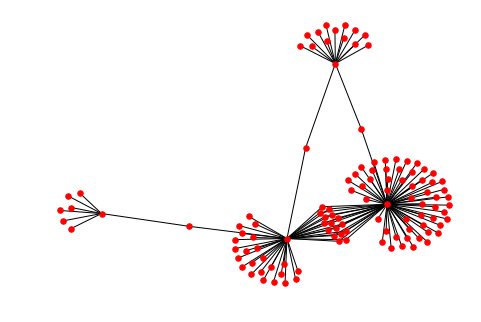

In [142]:
nx.draw(i_lcc, node_size=30)

In [267]:
u_lcc = max(nx.connected_component_subgraphs(G_u), key=len)

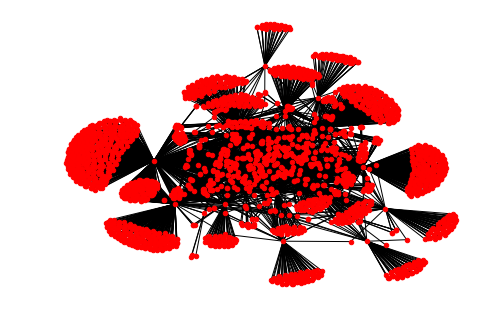

In [268]:
nx.draw(u_lcc, node_size=20)

### 1.2 a

In [298]:
print('Global measures for i-LCC (Largest connected component for the instersection:)')
print('No. nodes: ', nx.number_of_nodes(i_lcc))
print('No. edges: ', nx.number_of_edges(i_lcc))
print('Average path length: ', nx.average_shortest_path_length(i_lcc))
print('Average degree: ', nx.average_degree_connectivity(i_lcc))
degree_sum_i = 0
for node_degree_i in list(nx.degree(i_lcc)):
    degree_sum_i += node_degree_i[1]
average_degree_i = degree_sum_i/nx.number_of_nodes(i_lcc)
average_degree_i
print('Average degree (one value): ', average_degree_i)
print('Average clustering coefficient: ', nx.average_clustering(i_lcc))
print('Network diameter: ', nx.diameter(i_lcc))
print('Network radius: ', nx.radius(i_lcc))
print('Centralization: ', nx.global_reaching_centrality(i_lcc))

Global measures for i-LCC (Largest connected component for the instersection:)
No. nodes:  118
No. edges:  133
Average path length:  3.094596552223671
Average degree:  {2: 51.71052631578947, 1: 51.473684210526315, 15: 1.1333333333333333, 70: 1.2428571428571429, 7: 1.1428571428571428, 41: 1.4390243902439024}
Average degree (one value):  2.2542372881355934
Average clustering coefficient:  0.0
Network diameter:  6
Network radius:  3
Centralization:  0.35097523559061844


In [299]:
print('Global measures for u-LCC (Largest connected component for the union:)')
print('No. nodes: ', nx.number_of_nodes(u_lcc))
print('No. edges: ', nx.number_of_edges(u_lcc))
print('Average path length: ', nx.average_shortest_path_length(u_lcc))
print('Average degree: ', nx.average_degree_connectivity(u_lcc))
degree_sum_u = 0
for node_degree_u in list(nx.degree(u_lcc)):
    degree_sum_u += node_degree_u[1]
average_degree_u = degree_sum_u/nx.number_of_nodes(u_lcc)
average_degree_u
print('Average degree (one value): ', average_degree_u)
print('Average clustering coefficient: ', nx.average_clustering(u_lcc))
print('Network diameter: ', nx.diameter(u_lcc))
print('Network radius: ', nx.radius(u_lcc))
print('Centralization: ', nx.global_reaching_centrality(u_lcc))

Global measures for u-LCC (Largest connected component for the union:)
No. nodes:  2243
No. edges:  3668
Average path length:  3.415190405038492
Average degree:  {5: 262.884, 1: 355.37206178643385, 3: 305.2439024390244, 2: 367.4738805970149, 4: 282.4672131147541, 6: 256.42424242424244, 398: 5.402010050251256, 135: 5.333333333333333, 8: 203.525, 303: 5.768976897689769, 7: 255.73333333333332, 63: 1.8571428571428572, 10: 116.25, 753: 3.9840637450199203, 9: 253.0, 120: 6.4875, 352: 3.8806818181818183, 207: 5.6521739130434785, 49: 4.36734693877551, 61: 12.934426229508198, 198: 2.9242424242424243, 88: 1.7159090909090908, 79: 5.69620253164557, 235: 3.765957446808511, 95: 5.2, 171: 6.1988304093567255, 36: 2.4166666666666665, 130: 8.7, 83: 1.6385542168674698}
Average degree (one value):  3.270619705751226
Average clustering coefficient:  0.12082862641800761
Network diameter:  6
Network radius:  3
Centralization:  0.27117266055563943


### 1.2 b

In [332]:
colz = ['node','n_degree','betweeness','eigenvector','closeness','ratio']

degree_i = nx.degree(i_lcc)
betweeness_i = nx.betweenness_centrality(i_lcc)
eigenvector_i = nx.eigenvector_centrality(i_lcc)
closeness_i = nx.closeness_centrality(i_lcc)
tmpL = []
for n in list(i_lcc.nodes):
    tmpL.append([n, degree_i[n],betweeness_i[n],eigenvector_i[n],closeness_i[n],betweeness_i[n]/degree_i[n]])
i_lcc_df = pd.DataFrame(tmpL, columns=colz)

In [451]:
#i_lcc_df.to_csv('1.2_ilcc.csv')
i_lcc_df.head()

,node,n_degree,betweeness,eigenvector,closeness,ratio
0,Q13077,2,0.016661,0.106229,0.430147,0.00833
1,O95714,1,0.000000,0.073579,0.346154,0.00000
2,O15455,1,0.000000,0.073579,0.346154,0.00000
3,Q99683,1,0.000000,0.032650,0.306283,0.00000
4,Q99759,1,0.000000,0.073579,0.346154,0.00000


In [335]:
colz = ['node','n_degree','betweeness','eigenvector','closeness','ratio']

degree_u = nx.degree(u_lcc)
betweeness_u = nx.betweenness_centrality(u_lcc)
eigenvector_u = nx.eigenvector_centrality(u_lcc)
closeness_u = nx.closeness_centrality(u_lcc)
tmpL = []
for n in list(u_lcc.nodes):
    tmpL.append([n, degree_u[n],betweeness_u[n],eigenvector_u[n],closeness_u[n],betweeness_u[n]/degree_u[n]])
u_lcc_df = pd.DataFrame(tmpL, columns=colz)

In [452]:
#u_lcc_df.to_csv('1.2_ulcc.csv')
u_lcc_df.head()

,node,n_degree,betweeness,eigenvector,closeness,ratio
0,P30530,5,0.003085,0.031759,0.393817,0.000617
1,O60496,1,0.000000,0.003116,0.272949,0.000000
2,P19784,1,0.000000,0.003292,0.260093,0.000000
3,P07437,3,0.000150,0.030916,0.339646,0.000050
4,P98171,1,0.000000,0.003983,0.292957,0.000000


### task 2

Clustering using Markov

In [145]:
import markov_clustering as mc

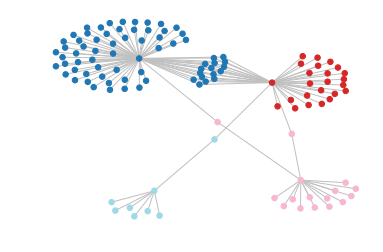

In [193]:
matrix_i = nx.to_scipy_sparse_matrix(i_lcc)
result_i = mc.run_mcl(matrix_i)
clusters_i = mc.get_clusters(result_i) 
mc.draw_graph(matrix_i, clusters_i, node_size=30, with_labels=False, edge_color="silver")

In [441]:
len(clusters_i)

4

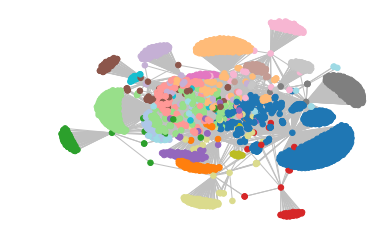

In [269]:
matrix_u = nx.to_scipy_sparse_matrix(u_lcc)
result_u = mc.run_mcl(matrix_u)
clusters_u = mc.get_clusters(result_u) 
mc.draw_graph(matrix_u, clusters_u, node_size=30, with_labels=False, edge_color="silver")

In [270]:
len(clusters_u)

21

In [273]:
clusters_markov_ulcc = []
for k in range (21):
    tmpL = []
    for i in clusters_u[k]:
        tmpL.append(list(u_lcc.nodes)[i])
    clusters_markov_ulcc.append(tmpL)


Clustering using Louvian

In [163]:
partition_i = community_louvain.best_partition(i_lcc)

In [283]:
list(matplotlib.colors.cnames.items())[1][0]

'antiquewhite'

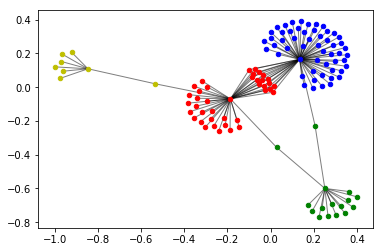

In [164]:
#drawing
colorz = ['r','b','g','y','pink','grey']
size = float(len(set(partition_i.values())))
pos = nx.spring_layout(i_lcc)
count = 0.
i = 0
for com in set(partition_i.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_i.keys()
                                if partition_i[nodes] == com]
    nx.draw_networkx_nodes(i_lcc, pos, list_nodes, node_size = 20,
                                node_color = colorz[i])
    i +=1


nx.draw_networkx_edges(i_lcc, pos, alpha=0.5)
plt.show()

In [280]:
partition_u = community_louvain.best_partition(u_lcc)

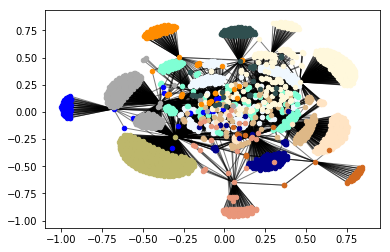

In [284]:
#drawing
colorz = list(matplotlib.colors.cnames.items())
size = float(len(set(partition_u.values())))
pos = nx.spring_layout(u_lcc)
count = 0.
i = 0
for com in set(partition_u.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_u.keys()
                                if partition_u[nodes] == com]
    nx.draw_networkx_nodes(u_lcc, pos, list_nodes, node_size = 20,
                                node_color = colorz[i*3][0])
    i +=1


nx.draw_networkx_edges(u_lcc, pos, alpha=0.5)
plt.show()

In [211]:
clusters_markov_ilcc = []
for k in range (4):
    tmpL = []
    for i in clusters_i[k]:
        tmpL.append(list(i_lcc.nodes)[i])
    clusters_markov_ilcc.append(tmpL)


In [218]:
with open('clusters_markov_ilcc.csv', 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(clusters_markov_ilcc)

In [274]:
with open('clusters_markov_ulcc.csv', 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(clusters_markov_ulcc)

In [208]:
clusters_louvian_ilcc = []
for i in range(4):
    tmpL = []
    for k, v in partition_i.items():
        if v == i: tmpL.append(k)
    clusters_louvian_ilcc.append(tmpL)



In [219]:
with open('clusters_louvian_ilcc.csv', 'w') as myfile2:
    wr = csv.writer(myfile2)
    wr.writerows(clusters_louvian_ilcc)

In [293]:
clusters_louvian_ulcc = []
for i in range(13):
    tmpL = []
    for k, v in partition_u.items():
        if v == i: tmpL.append(k)
    clusters_louvian_ulcc.append(tmpL)



In [294]:
with open('clusters_louvian_ulcc.csv', 'w') as myfile2:
    wr = csv.writer(myfile2)
    wr.writerows(clusters_louvian_ulcc)

In [292]:
len(clusters_louvian_ulcc[13])

0

in order to check the overrepresented seedgenes statistically, we need to get the following information:
total number of genes
number of overrepresented genes 

In [442]:
i_module = []
for c in range(len(clusters_markov_ilcc)):
    tmpL = []
    c_id = "Markov"
    m_id = c
    n_sg = len(set(seeds).intersection(set(i_lcc)))
    n_sgm = set(seeds).intersection(set(clusters_markov_ilcc[c]))
    n_g = clusters_markov_ilcc[m_id]
    p_val=hypergeom.sf(n_sg-1,len(list(i_lcc)),len(seeds),len(clusters_markov_ilcc[c]))
    tmpL = [c_id, m_id, len(n_sgm), len(n_g), n_sgm,n_g,p_val]
    if len(n_g)>=10:  i_module.append(tmpL)


In [443]:
for c in range(len(clusters_louvian_ilcc)):
    tmpL = []
    c_id = "Louvian"
    m_id = c
    n_sg = len(set(seeds).intersection(set(i_lcc)))
    n_sgm = set(seeds).intersection(set(clusters_louvian_ilcc[c]))
    n_g = clusters_louvian_ilcc[m_id]
    p_val=hypergeom.sf(n_sg-1,len(list(i_lcc)),len(seeds),len(clusters_louvian_ilcc[c]))
    tmpL = [c_id, m_id, len(n_sgm), len(n_g), n_sgm, n_g, p_val]
    if len(n_g)>=10:  i_module.append(tmpL)

i_modules_table = pd.DataFrame(i_module, columns=['Clustering Algo.','Module ID','No. seed genes','No. genes','seed genes','genes','p-value'])

In [445]:
#i_modules_table.to_csv('i_modules_table.csv')
i_modules_table

,Clustering Algo.,Module ID,No. seed genes,No. genes,seed genes,genes,p-value
0,Markov,0,1,70,{Q13546},"[Q13077, O95714, O15455, Q99759, P19438, Q9ULZ...",0.999998
1,Markov,1,1,24,{P21580},"[Q99683, Q14457, Q9UBU9, P04637, Q9UHD2, Q1357...",0.706799
2,Markov,2,1,16,{Q13568},"[O14896, Q92831, Q13568, O15111, Q9Y4K3, Q9983...",0.343685
3,Louvian,0,1,40,{P21580},"[Q13077, Q99683, P19438, Q14457, Q9UBU9, P0463...",0.979990
4,Louvian,1,1,54,{Q13546},"[O95714, O15455, Q99759, Q9ULZ3, Q99558, Q9NWF...",0.999413
5,Louvian,2,1,16,{Q13568},"[O14896, Q92831, Q13568, O15111, Q9Y4K3, Q9983...",0.343685


In [446]:
u_module = []
for c in range(len(clusters_markov_ulcc)):
    tmpL = []
    c_id = "Markov"
    m_id = c
    n_sg = len(set(seeds).intersection(set(u_lcc)))
    n_sgm = set(seeds).intersection(set(clusters_markov_ulcc[c]))
    n_g = clusters_markov_ulcc[m_id]
    p_val=hypergeom.sf(n_sg-1,len(list(u_lcc)),len(seeds),len(clusters_markov_ulcc[c]))
    tmpL = [c_id, m_id, len(n_sgm), len(n_g), n_sgm,n_g,p_val]
    if len(n_g)>=10:  u_module.append(tmpL)


In [447]:
for c in range(len(clusters_louvian_ulcc)):
    tmpL = []
    c_id = "Louvian"
    m_id = c
    n_sg = len(set(seeds).intersection(set(u_lcc)))
    n_sgm = set(seeds).intersection(set(clusters_louvian_ulcc[c]))
    n_g = clusters_louvian_ulcc[m_id]
    p_val=hypergeom.sf(n_sg-1,len(list(u_lcc)),len(seeds),len(clusters_louvian_ulcc[c]))
    tmpL = [c_id, m_id, len(n_sgm), len(n_g), n_sgm, n_g, p_val]
    if len(n_g)>=10:  u_module.append(tmpL)

u_modules_table = pd.DataFrame(u_module, columns=['Clustering Algo.','Module ID','No. seed genes','No. genes','seed genes','genes','p-value'])

In [449]:
#u_modules_table.to_csv('u_modules_table.csv')
u_modules_table

,Clustering Algo.,Module ID,No. seed genes,No. genes,seed genes,genes,p-value
0,Markov,0,1,678,{Q13546},"[P30530, P07437, Q07011, P27824, P53671, Q1350...",2.911539e-12
1,Markov,1,1,43,{P31994},"[O60496, P04141, Q8TD46, P04439, P01861, P0074...",2.508586e-41
2,Markov,2,1,68,{P29376},"[P19784, O60307, Q13480, Q13555, P51813, Q9256...",9.561246e-36
3,Markov,3,1,224,{P19878},"[P98171, P68543, Q71RG4, P13498, Q15646, Q0870...",3.708155e-23
4,Markov,4,1,61,{Q15116},"[P61803, Q9UK39, Q8N122, Q9UL18, P16260, Q9BXS...",5.278930e-37
5,Markov,5,1,296,{P11215},"[O75144, P04431, P30273, P07359, P13611, Q9546...",2.226387e-20
6,Markov,6,1,35,{Q9NSU2},"[O60934, Q13315, Q15573, P49863, Q53T94, Q9Y6H...",3.520291e-44
7,Markov,7,1,129,{Q9Y2R2},"[Q9UQ16, P28827, P60228, P19012, O15056, P1127...",8.604020e-29
8,Markov,8,1,68,{P16410},"[P30464, P30483, Q15772, P01892, P18464, Q1390...",9.561246e-36
9,Markov,9,1,84,{P02741},"[Q16653, P27361, O60243, O75493, P39060, Q9HBH...",2.234158e-33
